# Sentiment Analysis toward covid files

This notebook analysis the sentiment of tweets for one day used tool of textblob and pandas

In [3]:
import pandas as pd
import ast
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#open the file of the tweets
with open("corona_tweets_50_data.txt", encoding="utf8") as corona_file:
    tw=[]
    for line in corona_file:
        temp = ast.literal_eval(line)
        if(temp.get("geo","no") == "no"):
            continue
        elif(temp["geo"].get("place_id","no") == "no"):
            continue                                     
        tw.append(temp)
tws_df=pd.DataFrame(tw)

#remove unnecessary column
tws_df.drop(['lang', 'referenced_tweets','author_id', 'source', 'possibly_sensitive', 'public_metrics','entities', 'context_annotations', 'in_reply_to_user_id', 'attachments'], axis=1, inplace=True)

In [5]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)



#define a function to clean the text
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)#remove the @
    text = re.sub(r'#','',text) #remove the #
    text = re.sub(r'RT[\s]+','',text) #remove retweet
    text = re.sub(r'https?:\/\/\S+','',text) #remove http 
    text =  re.sub('\n','',text)
    text = remove_emoji(text)
    return text

tws_df['processed_text'] = tws_df['text'].apply(clean_text)

In [6]:
#define a function to get the subjectivity and polarity of the twitter
def get_text_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#define a function to get the subjectivity and polarity of the twitter
def get_text_polarity(text):
    return TextBlob(text).sentiment.polarity

tws_df['text_subjectivity_value'] = tws_df['processed_text'].apply(get_text_subjectivity)
tws_df['text_polarity_value'] = tws_df['processed_text'].apply(get_text_polarity)
tws_df

,created_at,id,text,geo,processed_text,text_subjectivity_value,text_polarity_value
0,2020-05-07T04:10:01.000Z,1258247691483713537,Me Neither! https://t.co/LWXJRb5lKt,{'place_id': 'ebf78e870cecf27c'},Me Neither!,0.000000,0.000000
1,2020-05-07T04:10:01.000Z,1258247692397969408,Can she donate plasma to Ruth Bader Ginsburg? ...,{'place_id': '7476e0af22ffc989'},Can she donate plasma to Ruth Bader Ginsburg? ...,0.000000,0.000000
2,2020-05-07T04:10:07.000Z,1258247716020183042,"I am 58 years old, have a wife and 4 children....",{'place_id': '447553a050a49d11'},"I am 58 years old, have a wife and 4 children....",0.437500,-0.106250
3,2020-05-07T04:10:17.000Z,1258247758772703232,Trump is scared of these facts and is totally ...,{'place_id': '6890a27317bf4a9b'},Trump is scared of these facts and is totally ...,0.750000,0.000000
4,2020-05-07T04:10:25.000Z,1258247792843259910,@realDonaldTrump Time to Dump Fauci. Watch the...,{'place_id': '01fd51395038e02e'},Time to Dump Fauci. Watch the Plandemic Docum...,0.166667,-0.104167
...,...,...,...,...,...,...,...
15945,2020-05-08T03:50:09.000Z,1258605081215283200,Covid-19 is the representation of my college c...,{'place_id': '00c39537733fa112'},Covid-19 is the representation of my college c...,0.800000,-0.750000
15946,2020-05-08T03:50:12.000Z,1258605093097594888,PM ScoMo announced Australia's 3 stage recover...,{'place_id': '01864a8a64df9dc4'},PM ScoMo announced Australia's 3 stage recover...,0.000000,0.000000
15947,2020-05-08T03:50:13.000Z,1258605096406904833,@townofvicpark Council’s #COVID19 recovery roa...,{'place_id': '0118c71c0ed41109'},Council’s COVID19 recovery roadmap RestartVic...,0.000000,0.000000
15948,2020-05-08T03:50:13.000Z,1258605098474889216,@jchatterleyCNN @KateBolduan I love the tag-te...,{'place_id': '01e215db7136a37e'},I love the tag-team! Makes business sense an...,0.600000,0.625000


In [18]:
tws_df['processed_text'][2]

"I am 58 years old, have a wife and 4 children. I have / cannot work because of this covid condition and cannot have food for my family. I beg for your help, please Dm me. I thank you for anyone's help. May Allah repay all your kindness.I'm tired of following the endless giveaway"

In [21]:
tws_df['processed_text'][15948]

'  I love the tag-team! Makes business sense any dayCOVID19 FirstMove'

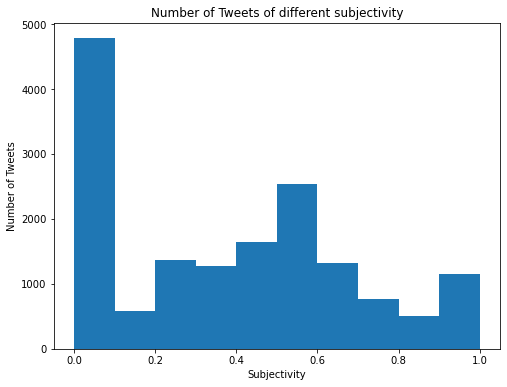

In [7]:
plt.figure(figsize=(8,6)) 
plt.hist(tws_df['text_subjectivity_value'],bins =10)
plt.xlabel('Subjectivity')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets of different subjectivity')
plt.show()

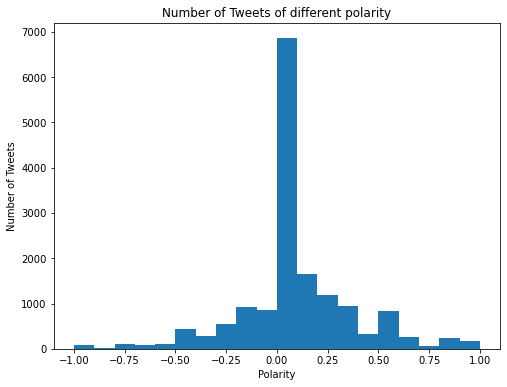

In [8]:
plt.figure(figsize=(8,6)) 
plt.hist(tws_df['text_polarity_value'],bins =20)
plt.xlabel('Polarity')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets of different polarity')
plt.show()

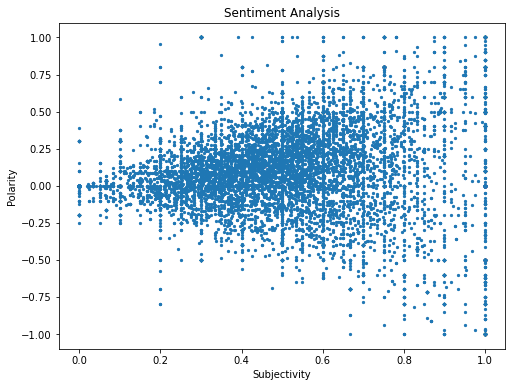

In [9]:
#draw the scatter plot
plt.figure(figsize=(8,6)) 
plt.scatter(tws_df['text_subjectivity_value'],tws_df['text_polarity_value'],s =5)
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.title('Sentiment Analysis')
plt.show()

In [10]:
#check the file of 
def get_polarity_analysis(value):
    if value<0:
        return 'Negative'
    elif value==0.0:
        return 'Neutral'
    else:
        return 'Postive'
tws_df['text_polarity'] = tws_df['text_polarity_value'].apply(get_polarity_analysis)
tws_df

,created_at,id,text,geo,processed_text,text_subjectivity_value,text_polarity_value,text_polarity
0,2020-05-07T04:10:01.000Z,1258247691483713537,Me Neither! https://t.co/LWXJRb5lKt,{'place_id': 'ebf78e870cecf27c'},Me Neither!,0.000000,0.000000,Neutral
1,2020-05-07T04:10:01.000Z,1258247692397969408,Can she donate plasma to Ruth Bader Ginsburg? ...,{'place_id': '7476e0af22ffc989'},Can she donate plasma to Ruth Bader Ginsburg? ...,0.000000,0.000000,Neutral
2,2020-05-07T04:10:07.000Z,1258247716020183042,"I am 58 years old, have a wife and 4 children....",{'place_id': '447553a050a49d11'},"I am 58 years old, have a wife and 4 children....",0.437500,-0.106250,Negative
3,2020-05-07T04:10:17.000Z,1258247758772703232,Trump is scared of these facts and is totally ...,{'place_id': '6890a27317bf4a9b'},Trump is scared of these facts and is totally ...,0.750000,0.000000,Neutral
4,2020-05-07T04:10:25.000Z,1258247792843259910,@realDonaldTrump Time to Dump Fauci. Watch the...,{'place_id': '01fd51395038e02e'},Time to Dump Fauci. Watch the Plandemic Docum...,0.166667,-0.104167,Negative
...,...,...,...,...,...,...,...,...
15945,2020-05-08T03:50:09.000Z,1258605081215283200,Covid-19 is the representation of my college c...,{'place_id': '00c39537733fa112'},Covid-19 is the representation of my college c...,0.800000,-0.750000,Negative
15946,2020-05-08T03:50:12.000Z,1258605093097594888,PM ScoMo announced Australia's 3 stage recover...,{'place_id': '01864a8a64df9dc4'},PM ScoMo announced Australia's 3 stage recover...,0.000000,0.000000,Neutral
15947,2020-05-08T03:50:13.000Z,1258605096406904833,@townofvicpark Council’s #COVID19 recovery roa...,{'place_id': '0118c71c0ed41109'},Council’s COVID19 recovery roadmap RestartVic...,0.000000,0.000000,Neutral
15948,2020-05-08T03:50:13.000Z,1258605098474889216,@jchatterleyCNN @KateBolduan I love the tag-te...,{'place_id': '01e215db7136a37e'},I love the tag-team! Makes business sense an...,0.600000,0.625000,Postive


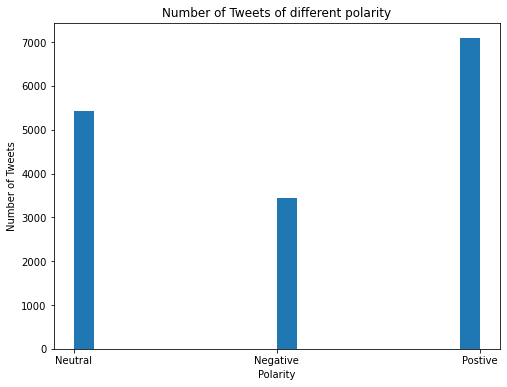

In [11]:
plt.figure(figsize=(8,6)) 
plt.hist(tws_df['text_polarity'],bins =20)
plt.xlabel('Polarity')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets of different polarity')
plt.show()